# **Recreating Sir Hans Rosling's 'World Bank Data' visualization**

- Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

- Loading datasets

In [4]:
country = pd.read_csv("/content/drive/MyDrive/Week 4 - World Bank Data/Metadata_Country.csv")
population = pd.read_csv("/content/drive/MyDrive/Week 4 - World Bank Data/country_population.csv")
fertility = pd.read_csv("/content/drive/MyDrive/Week 4 - World Bank Data/fertility_rate.csv")
life_expectancy = pd.read_csv("/content/drive/MyDrive/Week 4 - World Bank Data/life_expectancy.csv")

##**Getting an overview of the datasets**

- Getting first 5 values of 'country' dataset

In [5]:
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


- Getting first 5 values of 'fertility' dataset

In [6]:
fertility.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


- Getting first 5 values of 'population' dataset

In [7]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


- Getting first 5 values of 'life_expectancy' dataset

In [8]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Creating a copy of dataset to prevent data-loss

In [9]:
country_copy = country.copy()
population_copy = population.copy()
fertility_copy = fertility.copy()
life_expectancy_copy = life_expectancy.copy()

##**Data Cleaning**

- Dropping columns that are not required in the 'country' dataset

In [10]:
columns_to_drop = ['IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5']
country_copy.drop(columns=columns_to_drop, inplace=True)

- Getting the first 5 values of the dataset

In [11]:
country_copy.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


- Getting info about the dataset

In [12]:
country_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


- Checking for total number of null values in the dataset

In [13]:
country_copy.isna().sum()

Country Code     0
Region          46
dtype: int64

- Getting first 5 values of 'population' dataset

In [14]:
population_copy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


- Dropping columns that are not required in the 'population' dataset

In [15]:
columns_to_drop = ['Indicator Name', 'Indicator Code']
population_copy.drop(columns=columns_to_drop, inplace=True)

- Checking for total number of null values in the dataset

In [16]:
population_copy.isna().sum()

Country Name    0
Country Code    0
1960            4
1961            4
1962            4
1963            4
1964            4
1965            4
1966            4
1967            4
1968            4
1969            4
1970            4
1971            4
1972            4
1973            4
1974            4
1975            4
1976            4
1977            4
1978            4
1979            4
1980            4
1981            4
1982            4
1983            4
1984            4
1985            4
1986            4
1987            4
1988            4
1989            4
1990            2
1991            2
1992            3
1993            3
1994            3
1995            2
1996            2
1997            2
1998            1
1999            1
2000            1
2001            1
2002            1
2003            1
2004            1
2005            1
2006            1
2007            1
2008            1
2009            1
2010            1
2011            1
2012            2
2013      

- Getting info about the dataset

In [17]:
population_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   1960          260 non-null    float64
 3   1961          260 non-null    float64
 4   1962          260 non-null    float64
 5   1963          260 non-null    float64
 6   1964          260 non-null    float64
 7   1965          260 non-null    float64
 8   1966          260 non-null    float64
 9   1967          260 non-null    float64
 10  1968          260 non-null    float64
 11  1969          260 non-null    float64
 12  1970          260 non-null    float64
 13  1971          260 non-null    float64
 14  1972          260 non-null    float64
 15  1973          260 non-null    float64
 16  1974          260 non-null    float64
 17  1975          260 non-null    float64
 18  1976          260 non-null    

- Replacing mean values of the columns with the NaN values

In [18]:
years = [str(year) for year in range(1960, 2017)]
population_copy[years] = population_copy[years].astype('float64')

# For loop to replace the mean value of column with the NaN values
for year in years:
    population_copy[year].fillna(population_copy[year].mean(), inplace=True)

# Displaying first 5 values of the dataset
population_copy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


- Checking again for null values

In [19]:
population_copy.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

- Getting all the columns of the dataset

In [20]:
population_copy.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

- Getting the shape of the dataset

In [21]:
population_copy.shape

(264, 59)

- Melting the dataset

In [22]:
melted_population = pd.melt(population_copy,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Population')

- Getting the shape of the melted dataset

In [23]:
melted_population.shape

(15048, 3)

- Getting first 5 columns of the melted dataset

In [24]:
melted_population.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


- Merging the 'country' and 'population' dataset

In [25]:
country_and_population_merge = pd.merge(country_copy, melted_population,how='left',on='Country Code')

- Getting the first 5 values of the merged dataset

In [26]:
country_and_population_merge.head()

,Country Code,Region,Year,Population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


- Getting first 5 values of 'fertility_dataset'

In [27]:
fertility_copy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


- Dropping column that are not required in the 'fertility' dataset

In [28]:
columns_to_drop = ['Indicator Name', 'Indicator Code']
fertility_copy.drop(columns=columns_to_drop, inplace=True)

- Getting first 5 values of the 'fertility' dataset

In [29]:
fertility_copy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,7.478,7.524,7.563,7.592,7.611,7.619,7.618,7.613,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


- Checking for null values

In [30]:
fertility_copy.isna().sum()

Country Name     0
Country Code     0
1960            28
1961            27
1962            28
1963            29
1964            28
1965            28
1966            28
1967            28
1968            28
1969            28
1970            27
1971            26
1972            25
1973            27
1974            27
1975            26
1976            25
1977            26
1978            26
1979            26
1980            26
1981            24
1982            21
1983            24
1984            24
1985            24
1986            24
1987            20
1988            24
1989            24
1990            22
1991            22
1992            19
1993            23
1994            22
1995            20
1996            23
1997            19
1998            22
1999            21
2000            18
2001            18
2002            16
2003            18
2004            19
2005            17
2006            16
2007            15
2008            16
2009            16
2010        

- Replacing mean values of the columns with the NaN values

In [31]:
years = [str(year) for year in range(1960, 2017)]
fertility_copy[years] = fertility_copy[years].astype('float64')

# For loop to replace the mean value of column with the NaN values
for year in years:
    fertility_copy[year].fillna(fertility_copy[year].mean(), inplace=True)

# Displaying first 5 values of the dataset
fertility_copy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.4170,...,1.763,1.764,1.769,1.776,1.783000,1.791000,1.79600,1.800000,1.801000,1.800000
1,Afghanistan,AFG,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.4500,...,6.460,6.254,6.038,5.816,5.595000,5.380000,5.17400,4.981000,4.802000,4.635000
2,Angola,AGO,7.478000,7.524000,7.563000,7.592000,7.611000,7.619000,7.618000,7.6130,...,6.368,6.307,6.238,6.162,6.082000,6.000000,5.92000,5.841000,5.766000,5.694000
3,Albania,ALB,6.489000,6.401000,6.282000,6.133000,5.960000,5.773000,5.581000,5.3940,...,1.668,1.650,1.646,1.653,1.668000,1.685000,1.70000,1.710000,1.714000,1.713000
4,Andorra,AND,5.508217,5.493573,5.495798,5.495507,5.458346,5.415664,5.365999,5.3277,...,1.180,1.250,1.190,1.270,2.877849,2.843581,2.81519,2.791648,2.757183,2.728593


- Checking again for the null values

In [32]:
fertility_copy.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

- Melting the dataset

In [33]:
melted_fertility = pd.melt(fertility_copy,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Fertility')

- Getting first 5 values of the melted dataset

In [34]:
melted_fertility.head()

,Country Code,Year,Fertility
0,ABW,1960,4.820000
1,AFG,1960,7.450000
2,AGO,1960,7.478000
3,ALB,1960,6.489000
4,AND,1960,5.508217


- Merging the 'country-population' and 'fertility' dataset

In [35]:
country_population_fertility_merge = pd.merge(country_and_population_merge, melted_fertility, how='left', on = ['Country Code', 'Year'])

- Getting the first 5 values of the merged dataset

In [36]:
country_population_fertility_merge.head()

,Country Code,Region,Year,Population,Fertility
0,ABW,Latin America & Caribbean,1960,54211.0,4.820
1,ABW,Latin America & Caribbean,1961,55438.0,4.655
2,ABW,Latin America & Caribbean,1962,56225.0,4.471
3,ABW,Latin America & Caribbean,1963,56695.0,4.271
4,ABW,Latin America & Caribbean,1964,57032.0,4.059


- Getting the last 5 values of the merged dataset

In [37]:
country_population_fertility_merge.tail()

,Country Code,Region,Year,Population,Fertility
14986,ZWE,Sub-Saharan Africa,2012,14710826.0,3.996
14987,ZWE,Sub-Saharan Africa,2013,15054506.0,3.957
14988,ZWE,Sub-Saharan Africa,2014,15411675.0,3.903
14989,ZWE,Sub-Saharan Africa,2015,15777451.0,3.836
14990,ZWE,Sub-Saharan Africa,2016,16150362.0,3.760


- Getting first 5 values of the 'life-expectancy' dataset

In [38]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dropping the columns that are not required in the 'life_expectancy' dataset

In [39]:
columns_to_drop = ['Indicator Name', 'Indicator Code']
life_expectancy_copy.drop(columns=columns_to_drop, inplace=True)

- Getting first 5 values of the 'life_expectancy' dataset

In [40]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Checking for null values in the dataset

In [41]:
life_expectancy_copy.isna().sum()

Country Name     0
Country Code     0
1960            29
1961            28
1962            28
1963            29
1964            29
1965            28
1966            28
1967            28
1968            28
1969            28
1970            27
1971            28
1972            28
1973            27
1974            28
1975            28
1976            28
1977            28
1978            26
1979            27
1980            25
1981            25
1982            22
1983            24
1984            24
1985            24
1986            23
1987            20
1988            23
1989            23
1990            21
1991            20
1992            20
1993            22
1994            20
1995            20
1996            21
1997            18
1998            21
1999            20
2000            17
2001            19
2002            16
2003            19
2004            19
2005            18
2006            18
2007            17
2008            17
2009            17
2010        

- Replacing mean values of the columns with the NaN values

In [42]:
years = [str(year) for year in range(1960, 2017)]
life_expectancy_copy[years] = life_expectancy_copy[years].astype('float64')

# For loop to replace the mean value of column with the NaN values
for year in years:
    life_expectancy_copy[year].fillna(life_expectancy_copy[year].mean(), inplace=True)

# Displaying first 5 values of the dataset
life_expectancy_copy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,...,74.576000,74.725000,74.872000,75.016000,75.158000,75.299000,75.440000,75.582000,75.725000,75.867000
1,Afghanistan,AFG,32.292000,32.742000,33.185000,33.624000,34.060000,34.495000,34.928000,35.361000,...,59.694000,60.243000,60.754000,61.226000,61.666000,62.086000,62.494000,62.895000,63.288000,63.673000
2,Angola,AGO,33.251000,33.573000,33.914000,34.272000,34.645000,35.031000,35.426000,35.828000,...,55.096000,56.189000,57.231000,58.192000,59.042000,59.770000,60.373000,60.858000,61.241000,61.547000
3,Albania,ALB,62.279000,63.298000,64.187000,64.911000,65.461000,65.848000,66.108000,66.302000,...,75.656000,75.943000,76.281000,76.652000,77.031000,77.389000,77.702000,77.963000,78.174000,78.345000
4,Andorra,AND,53.367005,53.919724,54.313463,54.691397,55.183426,55.670319,56.136662,56.562796,...,69.163359,69.539978,69.926795,70.281339,70.634674,70.988004,71.226739,71.553303,71.745826,71.992154


- Checking again for the null values in the dataset

In [43]:
life_expectancy_copy.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

- Melting the dataset

In [44]:
melted_life_expectancy = pd.melt(life_expectancy_copy,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Life Expectancy')

- Getting the first 5 values of the melted dataset

In [45]:
melted_life_expectancy.head()

,Country Code,Year,Life Expectancy
0,ABW,1960,65.662000
1,AFG,1960,32.292000
2,AGO,1960,33.251000
3,ALB,1960,62.279000
4,AND,1960,53.367005


- Merging the 'country-population-fertility' and 'life_expectancy' dataset

In [46]:
country_population_fertility_life_expectancy_merge = pd.merge(country_population_fertility_merge, melted_life_expectancy, how='left', on = ['Country Code', 'Year'])

- Getting first 5 values of the merged dataset

In [47]:
country_population_fertility_life_expectancy_merge.head()

,Country Code,Region,Year,Population,Fertility,Life Expectancy
0,ABW,Latin America & Caribbean,1960,54211.0,4.820,65.662
1,ABW,Latin America & Caribbean,1961,55438.0,4.655,66.074
2,ABW,Latin America & Caribbean,1962,56225.0,4.471,66.444
3,ABW,Latin America & Caribbean,1963,56695.0,4.271,66.787
4,ABW,Latin America & Caribbean,1964,57032.0,4.059,67.113


- Creating a copy of the merged dataset and naming it as 'merged_final'

In [48]:
merged_final = country_population_fertility_life_expectancy_merge.copy()

- Getting info about the 'merged_final' dataset

In [49]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 14990
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     14991 non-null  object 
 1   Region           12369 non-null  object 
 2   Year             14991 non-null  object 
 3   Population       14991 non-null  float64
 4   Fertility        14991 non-null  float64
 5   Life Expectancy  14991 non-null  float64
dtypes: float64(3), object(3)
memory usage: 819.8+ KB


- Converting the 'Year' column of 'merged_final' dataset as of integer datatype

In [50]:
merged_final['Year'] = merged_final['Year'].astype(int)

- Getting info about the 'merged_final' dataset

In [51]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 14990
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     14991 non-null  object 
 1   Region           12369 non-null  object 
 2   Year             14991 non-null  int64  
 3   Population       14991 non-null  float64
 4   Fertility        14991 non-null  float64
 5   Life Expectancy  14991 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 819.8+ KB


## **Data Visualization**

- Visualizing population trends accross different regions

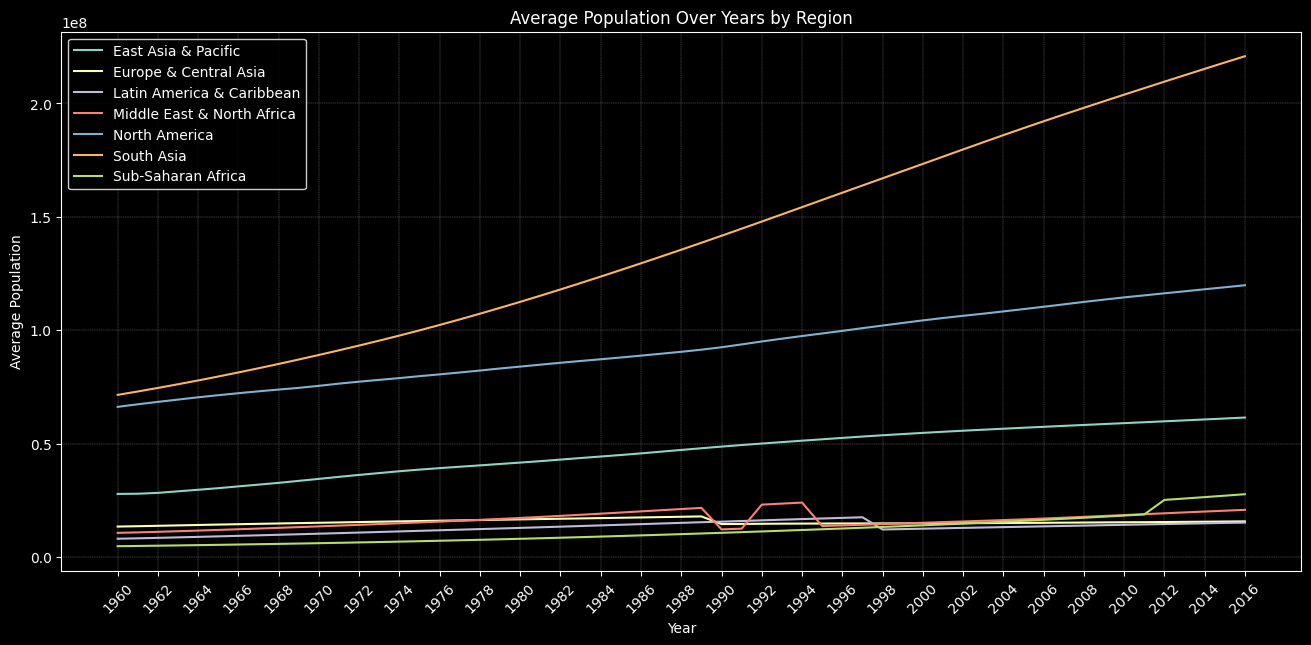

In [52]:
avg_population = merged_final.groupby(['Region', 'Year'])['Population'].mean().reset_index()

plt.style.use('dark_background')
plt.figure(figsize=(16, 7))
for region in avg_population['Region'].unique():
    subset = avg_population[avg_population['Region'] == region]
    plt.plot(subset['Year'], subset['Population'], label=region, linestyle='-')

plt.title('Average Population Over Years by Region', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Average Population', color='white')
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.3)

years = avg_population['Year'].unique()
plt.xticks(years[::2], rotation=45, color='white')
plt.yticks(color='white')

plt.show()

-	Visualizing fertility rate distribution accross different regions

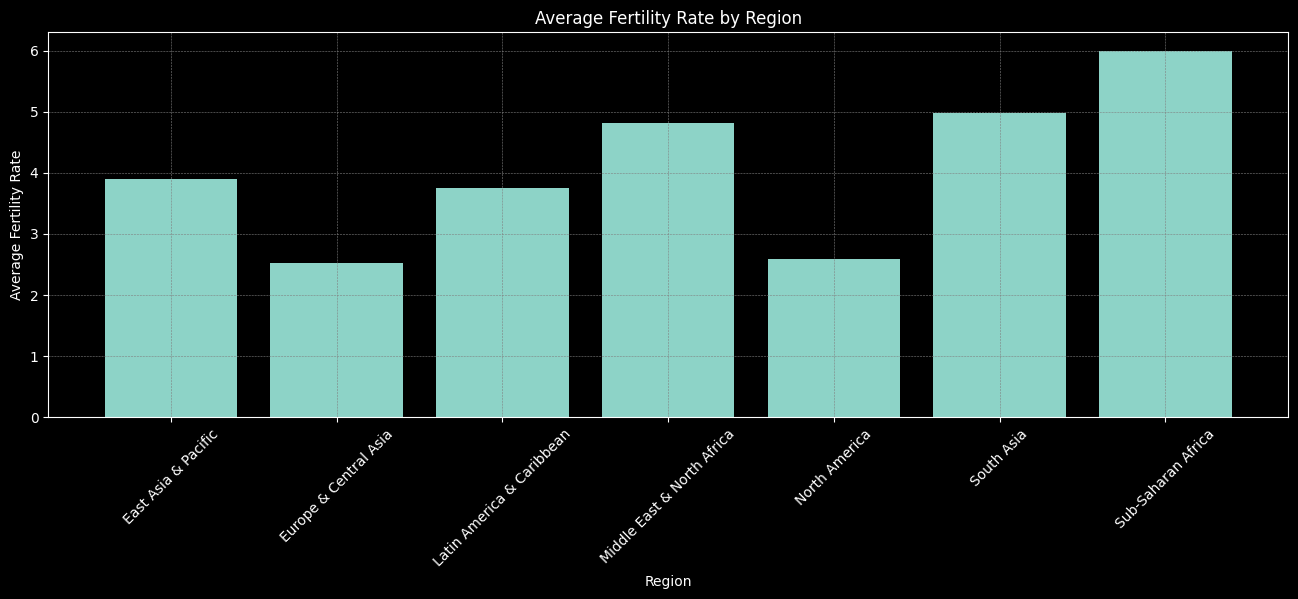

In [53]:
avg_fertility_rate = merged_final.groupby('Region')['Fertility'].mean().reset_index()

plt.style.use('dark_background')
plt.figure(figsize=(16, 5))
plt.bar(avg_fertility_rate['Region'], avg_fertility_rate['Fertility'])
plt.title('Average Fertility Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Fertility Rate')
plt.xticks(rotation=45)
plt.grid(True, color='gray', linestyle='--', linewidth=0.4)
plt.show()

- Visulaising	life expectancy variation accross different regions

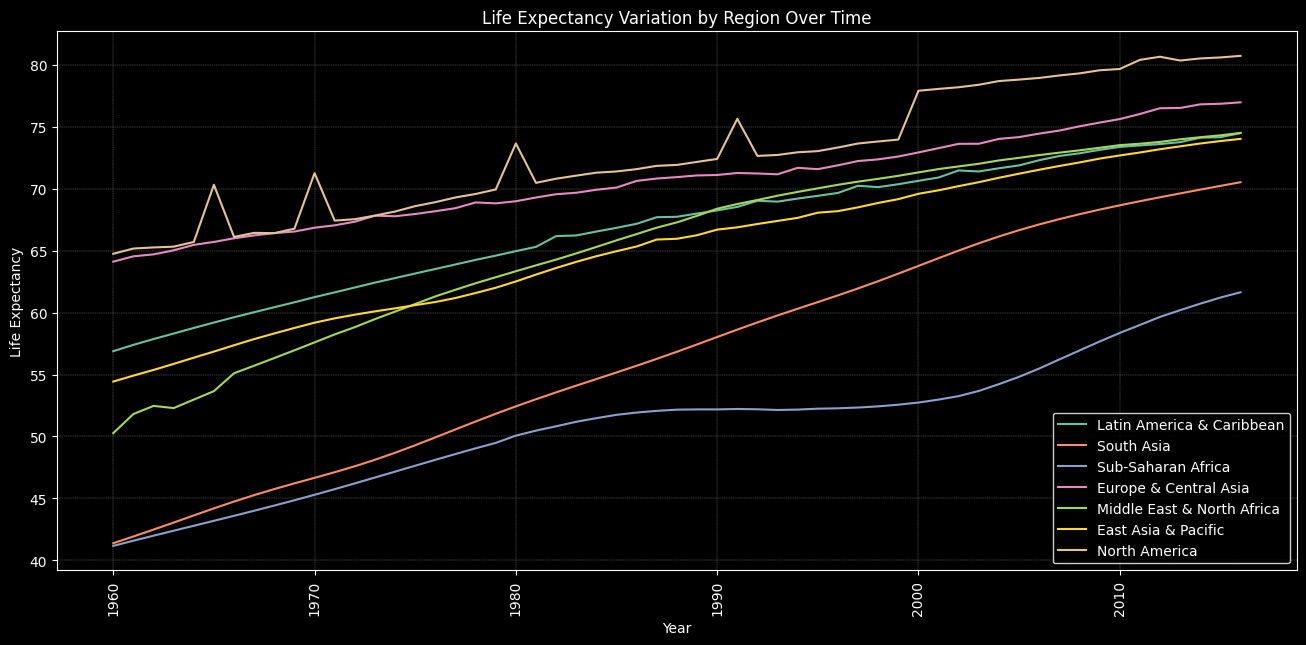

In [54]:
plt.style.use('dark_background')
plt.figure(figsize=(16, 7))
sns.lineplot(data=merged_final, x='Year', y='Life Expectancy', hue='Region', palette='Set2', errorbar=None)
plt.title('Life Expectancy Variation by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.xticks(rotation=90)
plt.grid(True, color='gray', linestyle='--', linewidth=0.3)
plt.show()

- Creating a correlation Analysis

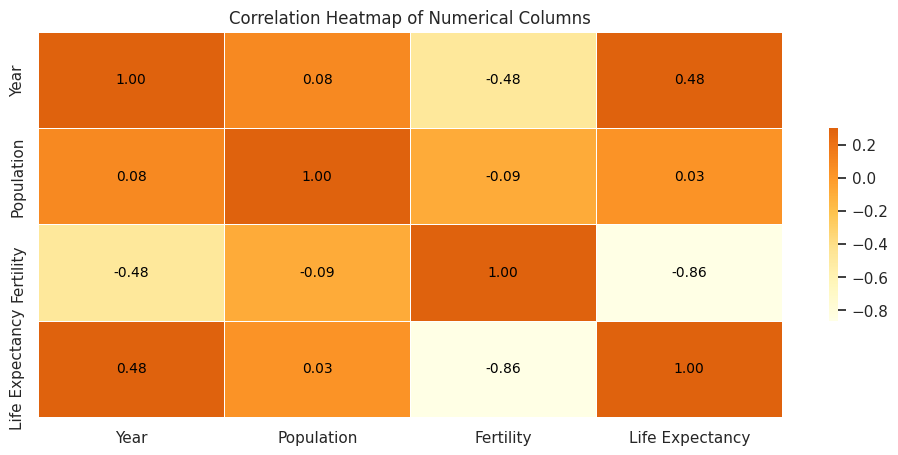

In [55]:
numerical_columns = merged_final.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = merged_final[numerical_columns].corr()

sns.set(style="white")

plt.figure(figsize=(12, 5))

cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 10, "color": 'black'})

plt.title('Correlation Heatmap of Numerical Columns')

plt.show()

- Creating animated Bubble Chart for Fertility vs Life Expectancy by Region

In [56]:
fig = px.scatter(merged_final,
                 x='Fertility',
                 y='Life Expectancy',
                 size='Population',
                 color='Region',
                 hover_name='Country Code',
                 animation_frame='Year',
                 animation_group='Country Code',
                 template='plotly_dark',
                 size_max=95,
                 range_x=[0, 10],
                 range_y=[20, 85],
                 title='Animated Bubble Chart: Fertility vs Life Expectancy by Region',
                 labels={'Fertility': 'Fertility', 'Life Expectancy': 'Life Expectancy', 'Population': 'Population', 'Region': 'Region', 'Country Code': 'Country Code'})

fig.update_layout(
    xaxis_title='Fertility',
    yaxis_title='Life Expectancy',
    legend_title='Region',
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial, sans-serif'))

fig.show()